In [186]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (accuracy_score, confusion_matrix, classification_report)
from sklearn.metrics import plot_confusion_matrix

df = pd.read_csv("./Cleaned-Data.csv").drop(columns = 'Country')

In [187]:
df.shape

(316800, 26)

In [234]:
df.head()

,Fever,Tiredness,Dry-Cough,Difficulty-in-Breathing,Sore-Throat,None_Sympton,Pains,Nasal-Congestion,Runny-Nose,Diarrhea,...,Gender_Male,Gender_Transgender,Severity_Mild,Severity_Moderate,Severity_None,Severity_Severe,Contact_Dont-Know,Contact_No,Contact_Yes,Stay_Home
0,1,1,1,1,1,0,1,1,1,1,...,1,0,1,0,0,0,0,0,1,1
1,1,1,1,1,1,0,1,1,1,1,...,1,0,1,0,0,0,0,1,0,1
2,1,1,1,1,1,0,1,1,1,1,...,1,0,1,0,0,0,1,0,0,1
3,1,1,1,1,1,0,1,1,1,1,...,1,0,0,1,0,0,0,0,1,0
4,1,1,1,1,1,0,1,1,1,1,...,1,0,0,1,0,0,0,1,0,0


In [226]:
df.columns

Index(['Fever', 'Tiredness', 'Dry-Cough', 'Difficulty-in-Breathing',
       'Sore-Throat', 'None_Sympton', 'Pains', 'Nasal-Congestion',
       'Runny-Nose', 'Diarrhea', 'None_Experiencing', 'Age_0-9', 'Age_10-19',
       'Age_20-24', 'Age_25-59', 'Age_60+', 'Gender_Female', 'Gender_Male',
       'Gender_Transgender', 'Severity_Mild', 'Severity_Moderate',
       'Severity_None', 'Severity_Severe', 'Contact_Dont-Know', 'Contact_No',
       'Contact_Yes', 'Stay_Home'],
      dtype='object')

In [189]:
df['Stay_Home'] = 0

In [246]:
df.loc[(df.Severity_None == 1) | (df.Severity_Mild == 1) | (df.Severity_Moderate == 1), "Stay_Home"] = 1

In [191]:
df.Stay_Home

0         1
1         1
2         1
3         0
4         0
         ..
316795    0
316796    0
316797    1
316798    1
316799    1
Name: Stay_Home, Length: 316800, dtype: int64

In [192]:
df['Stay_Home'].value_counts()

1    158400
0    158400
Name: Stay_Home, dtype: int64

In [247]:
x = df.drop(columns = 'Stay_Home').drop(columns = 'Severity_None').drop(columns = 'Severity_Mild').drop(columns = 'Severity_Moderate').drop(columns = 'Severity_Severe')
y = df.Stay_Home

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 56)

model = LogisticRegression().fit(x_train, y_train)

y_pred = model.predict(x_test)

In [211]:
y_pred

array([0, 0, 1, ..., 0, 0, 0], dtype=int64)

In [212]:
len(y_test)

95040

In [236]:
pd.DataFrame({'y_pred': y_pred, 'y_test': y_test}).head(15)

,y_pred,y_test
64825,0,1
602,0,1
106410,0,0
174810,1,0
257,0,0
217963,0,0
297704,1,0
124813,0,1
264858,0,0
12872,0,0


In [225]:
accuracy_score(y_test, y_pred)

0.49361321548821546

In [215]:
confusion_matrix(y_test, y_pred)

array([[24061, 23431],
       [24696, 22852]], dtype=int64)

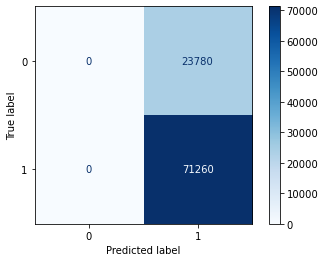

In [248]:
plot_confusion_matrix(model, x_test, y_test, values_format = '.0f', cmap = 'Blues');